# De novo design

### Developers: Mat Bieniek, Ben Cree, Rachael Pirie, Josh Horton

* Add R-groups in user-defined positions
* Output ADMET properties
* Perform constrained optimisation
* Score poses
* Send output to free energy calculations

Open source, customisable, fast/easy to use.

In [1]:
import copy
import glob
%cd /home/ndc104/programs/rgroups
import prody
from rdkit import Chem
from rdkit.Chem import Draw

from rgroup import RMol, RList, build_molecules, fix_receptor, optimise_in_receptor, RGroups, sort_conformers, ic50

/home/ndc104/programs/rgroups


<frozen importlib._bootstrap>:228: RuntimeWarning: to-Python converter for boost::shared_ptr<RDKit::FilterCatalogEntry const> already registered; second conversion method ignored.
/bin/bash: /home/ndc104/miniconda3/envs/r_groups/lib/libtinfo.so.6: no version information available (required by /bin/bash)


In [2]:
%cd /home/ndc104/programs/rgroups/sarscov2-3toR
%pwd

/home/ndc104/programs/rgroups/sarscov2-3toR


'/home/ndc104/programs/rgroups/sarscov2-3toR'

In [3]:
#!wget -nc https://files.rcsb.org/download/4GIH.pdb
#pdb = '4GIH.pdb'

In [4]:
# load the complex with the ligand
sys = prody.parsePDB('structures/7l10.pdb')

rec = sys.select('not (nucleic or hetatm) and not water')
mol = sys.select('resname XEY')
#mol = sys.select('resname 877')

prody.writePDB('rec.pdb', rec)
#prody.writePDB('lig.pdb', mol)

@> 2609 atoms and 1 coordinate set(s) were parsed in 0.03s.


'rec.pdb'

In [5]:
#!wget 'https://models.rcsb.org/v1/5nev/ligand?auth_seq_id=301&label_asym_id=E&encoding=sdf&filename=5nev_E_72L.sdf' -O lig.sdf
!obabel -ipdb lig.pdb -osdf -O coreh.sdf # H atoms already included
# ^manually modify the files if need be

/bin/bash: /home/ndc104/miniconda3/envs/r_groups/lib/libtinfo.so.6: no version information available (required by /bin/bash)
1 molecule converted


In [6]:
# load the ligand
# rdkit doesn't do a good job with protonation, 
#init_mol = Chem.MolFromPDBFile('lig.pdb', removeHs=False)
#init_mol = Chem.AddHs(init_mol, addCoords=True)

init_mol = Chem.SDMolSupplier('coreh.sdf', removeHs=False)[0]

# get the R group representation of the rdkit Mol
rinit_mol = RMol(init_mol)

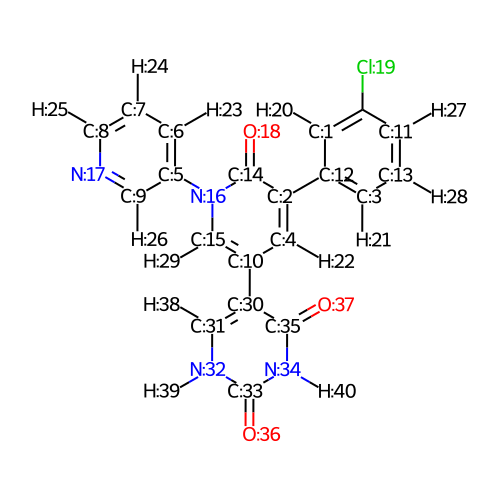

In [7]:
# select the atom to be replaced with the R group
rinit_mol.rep2D(idx=True, size=(500, 500))

In [8]:
# look up r groups and select
#RGroups #still dont know how to use this GUIipyn

In [9]:
#rgroups

In [10]:
## remove 44 since all conformers clash with protein
ligand_ids = [11, 14, 16, 17, 18, 19, 20, 21, 10, 12, 13, 24, 25]
# read the rgroups 1 by 1 in a loop
# assumes that there is only one -r.mol in each dir
rgroups = [Chem.MolFromMolFile(glob.glob(f'{ligand_id}/*-r.mol')[0], removeHs=False) for ligand_id in ligand_ids]
rgroups

In [11]:
ligand_ids[0] #to check what rgroup is failing optimisation or clash with protein

11

In [12]:
# build a list of molecules
attachment_index = [28]
rmols = build_molecules(rinit_mol, attachment_index, rgroups)

Rgroup atom index <rdkit.Chem.rdchem.QueryAtom object at 0x7f16a1f52f40> neighbouring <rdkit.Chem.rdchem.Atom object at 0x7f16a1f52e80>
Rgroup atom index <rdkit.Chem.rdchem.QueryAtom object at 0x7f16a1f52be0> neighbouring <rdkit.Chem.rdchem.Atom object at 0x7f16a1f52f40>
Rgroup atom index <rdkit.Chem.rdchem.QueryAtom object at 0x7f16a1f52e80> neighbouring <rdkit.Chem.rdchem.Atom object at 0x7f16a1f52be0>
Rgroup atom index <rdkit.Chem.rdchem.QueryAtom object at 0x7f16a1f52f40> neighbouring <rdkit.Chem.rdchem.Atom object at 0x7f16a1f52e80>
Rgroup atom index <rdkit.Chem.rdchem.QueryAtom object at 0x7f16a1f52e80> neighbouring <rdkit.Chem.rdchem.Atom object at 0x7f16a1f52dc0>
Rgroup atom index <rdkit.Chem.rdchem.QueryAtom object at 0x7f16a1f52dc0> neighbouring <rdkit.Chem.rdchem.Atom object at 0x7f16a1f52f40>
Rgroup atom index <rdkit.Chem.rdchem.QueryAtom object at 0x7f16a1f52f40> neighbouring <rdkit.Chem.rdchem.Atom object at 0x7f16a1f52e80>
Rgroup atom index <rdkit.Chem.rdchem.QueryAtom o

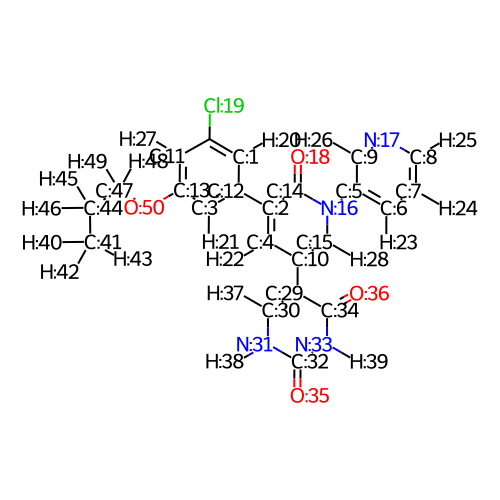

In [13]:
rmols[0].rep2D(idx=True, size=(500, 500))

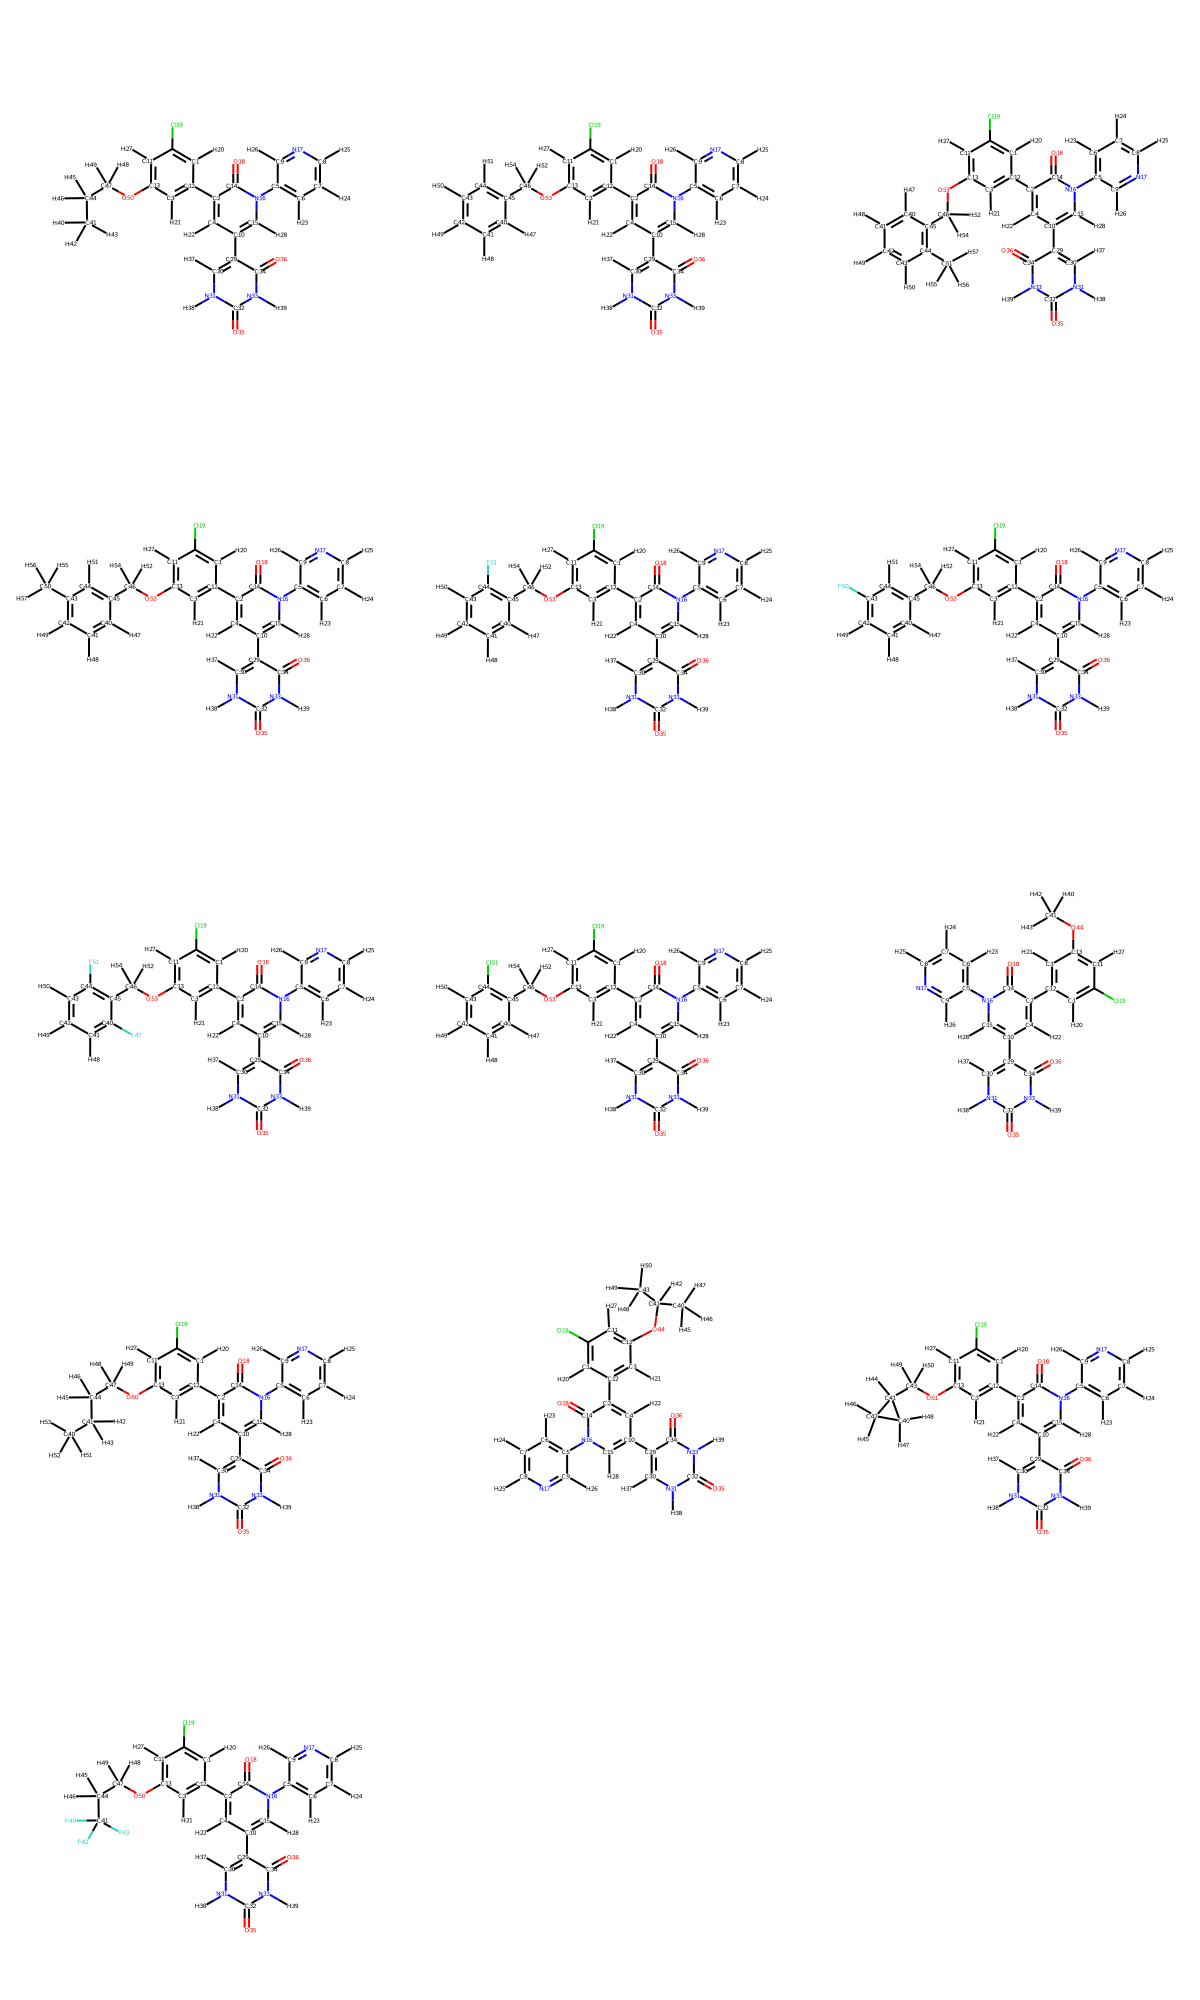

In [14]:
rmols.rep2D()

In [15]:
rmols[0].rep3D()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [16]:
rmols.toxicity()

,MW,HBA,HBD,LogP,Pass_Ro5,has_pains,has_unwanted_subs,has_prob_fgs,synthetic_accessibility
0,450.109483,6,2,3.38530,True,False,False,True,7.587298
0,498.109483,6,2,4.17550,True,False,False,True,7.696388
0,512.125133,6,2,4.48392,True,False,False,True,7.858397
0,512.125133,6,2,4.48392,True,False,False,True,7.858397
0,516.100061,6,2,4.31460,True,False,False,True,7.540930
0,516.100061,6,2,4.31460,True,False,False,True,7.540930
0,534.090639,6,2,4.45370,True,False,False,True,7.385471
0,532.070510,6,2,4.82890,True,False,False,True,7.538951
0,422.078183,6,2,2.60510,True,False,False,True,7.152990
0,464.125133,6,2,3.77540,True,False,False,True,7.788773


In [17]:
rmols.generate_conformers(num_conf=200,
                         minimum_conf_rms=0.5,
                         #flexible = [16, 17, 18, 27]
                         )

RMol 1
removed 148 duplicated conformations
RMol 2
removed 187 duplicated conformations
RMol 3
removed 173 duplicated conformations
RMol 4
removed 179 duplicated conformations
RMol 5
removed 186 duplicated conformations
RMol 6
removed 188 duplicated conformations
RMol 7
removed 187 duplicated conformations
RMol 8
removed 187 duplicated conformations
RMol 9
removed 198 duplicated conformations
RMol 10
removed 112 duplicated conformations
RMol 11
removed 163 duplicated conformations
RMol 12
removed 140 duplicated conformations
RMol 13
removed 127 duplicated conformations


In [18]:
rmols.GetNumConformers()

[53, 14, 28, 22, 15, 13, 14, 14, 3, 89, 38, 61, 74]

### Optimise conformers in context of protein

In [19]:
# fix the receptor file 
fix_receptor("rec.pdb", "rec_h.pdb")
# load back into prody
rec_fix = prody.parsePDB("rec_h.pdb")

@> 4638 atoms and 1 coordinate set(s) were parsed in 0.03s.


In [20]:
# filter by the protein clashes
rmols[0].rep3D(prody=rec_fix)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [21]:
rmols.removeConfsClashingWithProdyProt(rec_fix)

RMol 1
Clash with the protein. Removing conformer id: 51
Clash with the protein. Removing conformer id: 48
Clash with the protein. Removing conformer id: 47
Clash with the protein. Removing conformer id: 44
Clash with the protein. Removing conformer id: 43
Clash with the protein. Removing conformer id: 37
Clash with the protein. Removing conformer id: 35
Clash with the protein. Removing conformer id: 32
Clash with the protein. Removing conformer id: 30
Clash with the protein. Removing conformer id: 26
Clash with the protein. Removing conformer id: 25
Clash with the protein. Removing conformer id: 23
Clash with the protein. Removing conformer id: 19
Clash with the protein. Removing conformer id: 18
Clash with the protein. Removing conformer id: 17
Clash with the protein. Removing conformer id: 15
Clash with the protein. Removing conformer id: 14
Clash with the protein. Removing conformer id: 13
Clash with the protein. Removing conformer id: 10
Clash with the protein. Removing conformer 

In [22]:
rmols.GetNumConformers()

[30, 5, 2, 5, 4, 4, 4, 4, 3, 30, 24, 35, 36]

In [23]:
rmols[12].rep3D(prody=rec_fix)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [24]:
# opt_mol, energies
energies = rmols.optimise_in_receptor(
    receptor_file="rec_h.pdb", 
    ligand_force_field="openff", 
    use_ani=True,
    sigma_scale_factor=0.8,
    relative_permittivity=4
)

RMol 1


/bin/bash: /home/ndc104/miniconda3/envs/r_groups/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/ndc104/miniconda3/envs/r_groups/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/ndc104/miniconda3/envs/r_groups/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/ndc104/miniconda3/envs/r_groups/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/ndc104/miniconda3/envs/r_groups/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/ndc104/miniconda3/envs/r_groups/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/ndc104/miniconda3/envs/r_groups/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/ndc104/miniconda3/envs/r_groups/lib/libtinfo.so.6: no version information available (required by /bin/bash)


using ani2x


Optimising conformer: 100%|█████████████████████| 30/30 [02:34<00:00,  5.15s/it]


RMol 2


/bin/bash: /home/ndc104/miniconda3/envs/r_groups/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/ndc104/miniconda3/envs/r_groups/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/ndc104/miniconda3/envs/r_groups/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/ndc104/miniconda3/envs/r_groups/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/ndc104/miniconda3/envs/r_groups/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/ndc104/miniconda3/envs/r_groups/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/ndc104/miniconda3/envs/r_groups/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/ndc104/miniconda3/envs/r_groups/lib/libtinfo.so.6: no version information available (required by /bin/bash)


using ani2x


Optimising conformer: 100%|███████████████████████| 5/5 [00:27<00:00,  5.50s/it]


RMol 3


/bin/bash: /home/ndc104/miniconda3/envs/r_groups/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/ndc104/miniconda3/envs/r_groups/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/ndc104/miniconda3/envs/r_groups/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/ndc104/miniconda3/envs/r_groups/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/ndc104/miniconda3/envs/r_groups/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/ndc104/miniconda3/envs/r_groups/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/ndc104/miniconda3/envs/r_groups/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/ndc104/miniconda3/envs/r_groups/lib/libtinfo.so.6: no version information available (required by /bin/bash)


using ani2x


Optimising conformer: 100%|███████████████████████| 2/2 [00:07<00:00,  3.64s/it]


RMol 4


/bin/bash: /home/ndc104/miniconda3/envs/r_groups/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/ndc104/miniconda3/envs/r_groups/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/ndc104/miniconda3/envs/r_groups/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/ndc104/miniconda3/envs/r_groups/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/ndc104/miniconda3/envs/r_groups/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/ndc104/miniconda3/envs/r_groups/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/ndc104/miniconda3/envs/r_groups/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/ndc104/miniconda3/envs/r_groups/lib/libtinfo.so.6: no version information available (required by /bin/bash)


using ani2x


Optimising conformer: 100%|███████████████████████| 5/5 [00:26<00:00,  5.29s/it]


RMol 5


/bin/bash: /home/ndc104/miniconda3/envs/r_groups/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/ndc104/miniconda3/envs/r_groups/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/ndc104/miniconda3/envs/r_groups/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/ndc104/miniconda3/envs/r_groups/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/ndc104/miniconda3/envs/r_groups/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/ndc104/miniconda3/envs/r_groups/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/ndc104/miniconda3/envs/r_groups/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/ndc104/miniconda3/envs/r_groups/lib/libtinfo.so.6: no version information available (required by /bin/bash)


using ani2x


Optimising conformer: 100%|███████████████████████| 4/4 [00:25<00:00,  6.32s/it]


RMol 6


/bin/bash: /home/ndc104/miniconda3/envs/r_groups/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/ndc104/miniconda3/envs/r_groups/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/ndc104/miniconda3/envs/r_groups/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/ndc104/miniconda3/envs/r_groups/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/ndc104/miniconda3/envs/r_groups/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/ndc104/miniconda3/envs/r_groups/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/ndc104/miniconda3/envs/r_groups/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/ndc104/miniconda3/envs/r_groups/lib/libtinfo.so.6: no version information available (required by /bin/bash)


using ani2x


Optimising conformer: 100%|███████████████████████| 4/4 [00:23<00:00,  5.90s/it]


RMol 7


/bin/bash: /home/ndc104/miniconda3/envs/r_groups/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/ndc104/miniconda3/envs/r_groups/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/ndc104/miniconda3/envs/r_groups/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/ndc104/miniconda3/envs/r_groups/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/ndc104/miniconda3/envs/r_groups/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/ndc104/miniconda3/envs/r_groups/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/ndc104/miniconda3/envs/r_groups/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/ndc104/miniconda3/envs/r_groups/lib/libtinfo.so.6: no version information available (required by /bin/bash)


using ani2x


Optimising conformer: 100%|███████████████████████| 4/4 [00:30<00:00,  7.50s/it]


RMol 8


/bin/bash: /home/ndc104/miniconda3/envs/r_groups/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/ndc104/miniconda3/envs/r_groups/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/ndc104/miniconda3/envs/r_groups/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/ndc104/miniconda3/envs/r_groups/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/ndc104/miniconda3/envs/r_groups/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/ndc104/miniconda3/envs/r_groups/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/ndc104/miniconda3/envs/r_groups/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/ndc104/miniconda3/envs/r_groups/lib/libtinfo.so.6: no version information available (required by /bin/bash)


using ani2x


Optimising conformer: 100%|███████████████████████| 4/4 [00:16<00:00,  4.24s/it]


RMol 9


/bin/bash: /home/ndc104/miniconda3/envs/r_groups/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/ndc104/miniconda3/envs/r_groups/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/ndc104/miniconda3/envs/r_groups/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/ndc104/miniconda3/envs/r_groups/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/ndc104/miniconda3/envs/r_groups/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/ndc104/miniconda3/envs/r_groups/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/ndc104/miniconda3/envs/r_groups/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/ndc104/miniconda3/envs/r_groups/lib/libtinfo.so.6: no version information available (required by /bin/bash)


using ani2x


Optimising conformer: 100%|███████████████████████| 3/3 [00:11<00:00,  3.73s/it]


RMol 10


/bin/bash: /home/ndc104/miniconda3/envs/r_groups/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/ndc104/miniconda3/envs/r_groups/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/ndc104/miniconda3/envs/r_groups/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/ndc104/miniconda3/envs/r_groups/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/ndc104/miniconda3/envs/r_groups/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/ndc104/miniconda3/envs/r_groups/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/ndc104/miniconda3/envs/r_groups/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/ndc104/miniconda3/envs/r_groups/lib/libtinfo.so.6: no version information available (required by /bin/bash)


using ani2x


Optimising conformer: 100%|█████████████████████| 30/30 [02:08<00:00,  4.28s/it]


RMol 11


/bin/bash: /home/ndc104/miniconda3/envs/r_groups/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/ndc104/miniconda3/envs/r_groups/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/ndc104/miniconda3/envs/r_groups/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/ndc104/miniconda3/envs/r_groups/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/ndc104/miniconda3/envs/r_groups/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/ndc104/miniconda3/envs/r_groups/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/ndc104/miniconda3/envs/r_groups/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/ndc104/miniconda3/envs/r_groups/lib/libtinfo.so.6: no version information available (required by /bin/bash)


using ani2x


Optimising conformer: 100%|█████████████████████| 24/24 [01:50<00:00,  4.62s/it]


RMol 12


/bin/bash: /home/ndc104/miniconda3/envs/r_groups/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/ndc104/miniconda3/envs/r_groups/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/ndc104/miniconda3/envs/r_groups/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/ndc104/miniconda3/envs/r_groups/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/ndc104/miniconda3/envs/r_groups/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/ndc104/miniconda3/envs/r_groups/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/ndc104/miniconda3/envs/r_groups/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/ndc104/miniconda3/envs/r_groups/lib/libtinfo.so.6: no version information available (required by /bin/bash)


using ani2x


Optimising conformer: 100%|█████████████████████| 35/35 [03:37<00:00,  6.23s/it]


RMol 13


/bin/bash: /home/ndc104/miniconda3/envs/r_groups/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/ndc104/miniconda3/envs/r_groups/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/ndc104/miniconda3/envs/r_groups/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/ndc104/miniconda3/envs/r_groups/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/ndc104/miniconda3/envs/r_groups/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/ndc104/miniconda3/envs/r_groups/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/ndc104/miniconda3/envs/r_groups/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/ndc104/miniconda3/envs/r_groups/lib/libtinfo.so.6: no version information available (required by /bin/bash)


using ani2x


Optimising conformer: 100%|█████████████████████| 36/36 [02:59<00:00,  4.98s/it]


In [25]:
rmols[0].rep3D()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [26]:
for i in range(len(ligand_ids)):
    rmols[i].to_file("optimised_coords_" + str(ligand_ids[i]) + ".pdb")

In [27]:
print(energies)

[[-1130872.3655914154, -1130870.4032369512, -1130872.2364939735, -1130870.3973487394, -1130872.2361455956, -1130872.2373228685, -1130872.6691512242, -1130729.728616398, -1130872.9761915442, -1130871.615850981, -1130730.557820602, -1130872.669185676, -1130872.3648840063, -1130871.615341531, -1130869.6428015463, -1130872.7348788993, -1130872.915611724, -1130871.615674583, -1130672.4427456982, -1130869.6433801115, -1130870.3925059275, -1130869.3234568418, -1130871.3040368103, -1130872.2367597623, -1130872.3671819034, -1130872.9234879108, -1130861.8910673356, -1130872.6693110284, -1130869.6433086053, -1130871.614966469], [-1226268.3258592284, -1226487.4540320507, -1226487.449032902, -1226489.6845366994, -1226489.806797733], [-1251183.133272527, -1251183.2566389246], [-1251181.7453377107, -1251184.6986877515, -1251180.5394690153, -1251172.5874136463, -1251183.1785165481], [-1288752.722643771, -1288754.7721031273, -1288751.9074192776, -1288751.4370118289], [-1288748.2328795611, -1288747.3240

In [28]:
final_energies = rmols.sort_conformers(energy_range=5)

RMol 1
RMol 2
RMol 3
RMol 4
RMol 5
RMol 6
RMol 7
RMol 8
RMol 9
RMol 10
RMol 11
RMol 12
RMol 13


In [29]:
len(ligand_ids) == len(rmols) #check theyre equal or very bad and silent things happen

True

In [30]:
for i in range(len(ligand_ids)):
    rmols[i].to_file("best_conformers_" + str(ligand_ids[i]) + ".pdb")

In [31]:
print(final_energies)

[[0.0, 0.052703633438795805, 0.06057982030324638, 0.24131264491006732, 0.3068805157672614, 0.307005868293345, 0.3070403200108558, 0.6090096407569945, 0.6106001287698746, 0.6113075378816575, 0.738868675660342, 0.7394317819271237, 0.7396975706797093, 0.7400459486525506, 1.3603405631147325, 1.3605169611983001, 1.3608500130940229, 1.361225075321272, 1.6721547339111567, 2.572954592993483, 2.5788428047671914, 2.583685616729781, 3.3328114326577634, 3.3328829389065504, 3.333389997947961, 3.6527347024530172], [0.0, 0.12226103362627327, 2.3527656823862344, 2.3577648310456425], [0.0, 0.12336639757268131], [0.0, 1.5201712034177035, 2.953350040828809, 4.159218736225739], [0.0, 2.0494593563489616, 2.864683849737048, 3.3350912984460592], [0.0, 2.1609165160916746, 2.2256816879380494, 3.069774850271642], [0.0, 0.030272676376625896, 3.6923682941123843, 3.930825444869697], [0.0], [0.0, 0.831102977739647, 2.918787229107693], [0.0, 0.024807096924632788, 1.1428866407368332, 1.142895924858749, 1.143657694570

In [32]:
RMol.set_gnina(loc='/home/ndc104/programs/rgroups/gnina')

In [33]:
CNNscores = rmols.gnina(receptor_file="rec_h.pdb") 
CNNscores

RMol 1
RMol 2
RMol 3
RMol 4
RMol 5
RMol 6
RMol 7
RMol 8
RMol 9
RMol 10
RMol 11
RMol 12
RMol 13


[[7.12766,
  7.12721,
  7.12717,
  7.12734,
  7.34181,
  7.3418,
  7.34181,
  7.24876,
  7.24882,
  7.24888,
  7.36998,
  7.36994,
  7.36995,
  7.36994,
  7.37219,
  7.37216,
  7.37219,
  7.37221,
  7.18479,
  7.1585,
  7.15816,
  7.15803,
  7.2474,
  7.24739,
  7.24739,
  7.09686],
 [7.50334, 7.50342, 7.44942, 7.4497],
 [7.71244, 7.7114],
 [7.49964, 7.47811, 7.45181, 7.33989],
 [7.56821, 7.77587, 7.484, 7.65503],
 [7.51833, 7.46835, 7.5134, 7.53612],
 [7.86174, 7.86187, 7.60353, 7.61325],
 [7.91458],
 [7.12833, 7.10577, 7.14395],
 [7.24949,
  7.25139,
  7.38773,
  7.38772,
  7.38776,
  7.3587,
  7.35615,
  7.43135,
  7.43131,
  7.26381,
  7.26352,
  7.40809,
  7.18273,
  7.17272,
  7.17275,
  7.24024,
  7.29086,
  7.28574,
  7.12317,
  7.12226,
  7.09978,
  7.12991,
  7.12964,
  7.29438,
  7.29432],
 [7.18793,
  7.18302,
  7.18158,
  7.18141,
  7.18143,
  7.1807,
  7.18062,
  7.18041,
  7.17999,
  7.1799,
  7.1792,
  7.17824,
  7.30618,
  7.30616,
  7.30616,
  7.30615,
  7.30615,
  7.

In [34]:
ic50_scores = []
for i in range(len(CNNscores)):
    ic50_scores.append([ic50(x) for x in CNNscores[i]])

In [35]:
ic50_scores

[[74.53152371605296,
  74.60879056863809,
  74.6156626086612,
  74.5864608092898,
  45.51871569561308,
  45.519763814842044,
  45.51871569561308,
  56.3949219585671,
  56.387131250345156,
  56.3793416183751,
  42.65991639667553,
  42.66384570112646,
  42.662863341085085,
  42.66384570112646,
  42.44338372673203,
  42.44631571307802,
  42.44338372673203,
  42.44142918168412,
  65.34464456368234,
  69.4224601714119,
  69.47683083290697,
  69.49763086679967,
  56.57180034775737,
  56.57310297659597,
  56.57310297659597,
  80.00921326703053],
 [31.380510179421012,
  31.374730208196368,
  35.52875588417919,
  35.50585703126239],
 [19.389204892140317, 19.435691636476914],
 [31.649000557343026,
  33.25753065015221,
  35.333771811360805,
  45.72039775675702],
 [27.026512003826973,
  16.754443218778395,
  32.809529311311906,
  22.129418397190058],
 [30.315867482587397,
  34.01339636277964,
  30.661966160107387,
  29.099129683075958],
 [13.748648219235836,
  13.744533368911126,
  24.915522549768

In [36]:
for i in range(len(ic50_scores)):
    with open('scores_' + str(ligand_ids[i]) + '.dat', 'w') as f:
        for x in range(len(ic50_scores[i])):
            f.write(str(ic50_scores[i][x])+'\n')

In [37]:
lowest = []
for i in range(len(ic50_scores)):
    lowest.append(ic50_scores[i][0])

In [38]:
lowest #lowest gnina values in nM

[74.53152371605296,
 31.380510179421012,
 19.389204892140317,
 31.649000557343026,
 27.026512003826973,
 30.315867482587397,
 13.748648219235836,
 12.173627256889269,
 74.41663019623313,
 56.30020808469826,
 64.87389894926504,
 37.16806911167099,
 55.8495913831936]

In [39]:
# 11, 14, 16, 17, 18, 19, 20, 21, 10, 12, 13, 24, 25

expt = [120, 128, 100, 110, 24, 37, 36, 18, 1200, 250, 190, 37, 25]

In [40]:
import matplotlib.pyplot as plt
import numpy as np

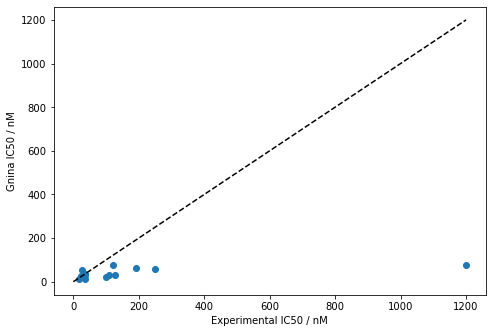

In [41]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(expt, lowest) #, color='black', marker='x')
ax.set_xlabel('Experimental IC50 / nM')
ax.set_ylabel('Gnina IC50 / nM')

x = np.linspace(0,1200,10)
ax.plot(x, x, color='black', linestyle='--')

plt.savefig('ic50.png', bbox_inches='tight')
plt.show()

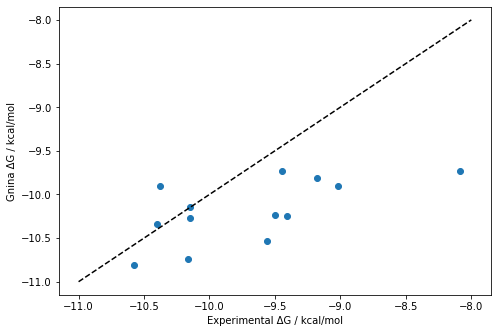

In [42]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])

RT = 0.593 # kcal/mol

# convert nM to M
lowestinM = [ i * 1e-9 for i in lowest]
exptinM = [ i * 1e-9 for i in expt]

# DG = RTln(K)
ax.scatter(RT*np.log(exptinM), RT*np.log(lowestinM)) #, color='black', marker='x')
ax.set_xlabel('Experimental \u0394G / kcal/mol')
ax.set_ylabel('Gnina \u0394G / kcal/mol')

x = np.linspace(-11,-8,10)
ax.plot(x, x, color='black', linestyle='--')

plt.savefig('deltaG.png', bbox_inches='tight')
plt.show()